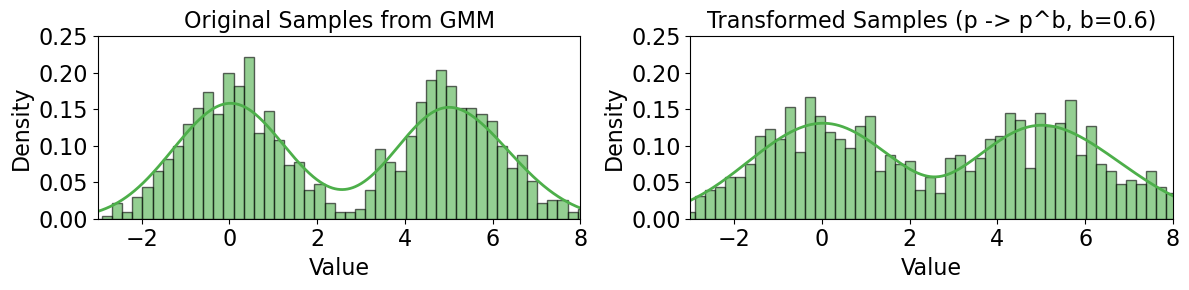

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde

# Setting seed for reproducibility
np.random.seed(42)

# Parameters for the GMM
n_samples = 1000
means = [0, 5]  # Means of the two components
covariances = [1, 1]  # Variances of the two components

# Generate samples from the GMM
gmm = GaussianMixture(n_components=2)
gmm.means_init = np.array([[means[0]], [means[1]]])
gmm.fit(np.random.rand(100, 1))  # Initial fit for setting means
gmm.means_ = np.array([[means[0]], [means[1]]])
gmm.covariances_ = np.array([[[covariances[0]]], [[covariances[1]]]])
gmm.weights_ = np.array([0.5, 0.5])

samples, _ = gmm.sample(n_samples)

# Estimate the PDF using kernel density estimation (KDE)
kde = gaussian_kde(samples.T[0])

# Create a range of values for the PDF
x = np.linspace(min(samples), max(samples), 1000).reshape(-1, 1).flatten()
pdf = kde(x)

# Transform the PDF: p -> p^b where b = 0.8
b = 0.6
transformed_pdf = pdf ** b

# Normalize the transformed PDF to make it a valid density function
transformed_pdf /= np.trapz(transformed_pdf, x)

# Generate new samples based on the transformed PDF
transformed_samples = np.random.choice(x, size=n_samples, p=transformed_pdf/np.sum(transformed_pdf))
# Plotting the original and transformed samples
plt.figure(figsize=(12, 3))

# Original samples
plt.subplot(1, 2, 1)
plt.hist(samples, bins=50, alpha=0.6, color='#4daf4a', edgecolor='black', density=True)
plt.plot(x, pdf, color='#4daf4a', lw=2)
plt.title("Original Samples from GMM", fontsize=16)
plt.xlabel("Value", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-3, 8)
plt.ylim(0, 0.25)

# Transformed samples
plt.subplot(1, 2, 2)
plt.hist(transformed_samples, bins=50, alpha=0.6, color='#4daf4a', edgecolor='black', density=True)
plt.plot(x, transformed_pdf, color='#4daf4a', lw=2)
plt.title("Transformed Samples (p -> p^b, b=0.6)", fontsize=16)
plt.xlabel("Value", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-3, 8)
plt.ylim(0, 0.25)

plt.tight_layout()
plt.savefig('modified-gmm.png')
plt.show()
